# Nearest Centroid Classifier
The ```NearestCentroid``` classifier is a simple algorithm that represents each class by the centroid of its members. In effect, this makes it similar to the label updating phase of the ```sklearn.KMeans``` algorithm. It also has no parameters to choose, making it a good baseline classifier


useful link: http://scikit-learn.org/stable/modules/neighbors.html

In [38]:
import numpy as np

# global variable
global img_number
img_number = 700

output_filename = 'digit_fv.train'
digit_data = np.loadtxt(output_filename, dtype='float64')

print("Size of the feature vector", digit_data.shape)
print digit_data[0:10,0:]

('Size of the feature vector', (978, 785))
[[ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]
 [ 6.  1.  1. ...,  1.  1.  1.]]


In [39]:
import math
from skimage import io

# show image
def vec2img(vec):
    
    img_row = int(math.sqrt(vec.shape[0]))
    img_col = img_row
    img = vec.reshape((img_row, img_col))
    
    io.imshow(img)
    io.show()
    
# check predict
def chkpredict(actual_class, predict_class):
    if(actual_class==predict_class):
        print("(Correct prediction)")
    else:
        print("(Incorrect prediction)")

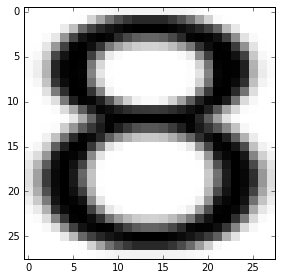

In [40]:
# show image
vec2img(digit_data[img_number,1:])

In [41]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np

X = digit_data[:,1:]
y = digit_data[:,0]

print("Size of feature vector", X.shape)
print("Size of label", y.shape)

# create a model
clf = NearestCentroid()
clf.fit(X, y)

print("Actual", y[img_number])
predict_class = clf.predict([X[img_number,:]])
print("Predict", predict_class)
chkpredict(y[img_number], predict_class)

('Size of feature vector', (978, 784))
('Size of label', (978,))
('Actual', 8.0)
('Predict', array([ 8.]))
(Correct prediction)


# Nearest Neighbors Classification
Neighbors-based classification is a type of *instance-based learning* or *non-generalizing learning*: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

The k-neighbors classification in ```KNeighborsClassifier``` is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

useful link: http://scikit-learn.org/stable/modules/neighbors.html#neighbors

In [42]:
# KNN
from sklearn import neighbors

# Classifier implementing the k-nearest neighbors vote.
knn = neighbors.KNeighborsClassifier()    
    # default: n_neighbors=5, weights='uniform'

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, y)

print("Actual", y[img_number])
predict_class = knn.predict([X[img_number,:]])
print("Predict", predict_class)
chkpredict(y[img_number], predict_class)

('Actual', 8.0)
('Predict', array([ 8.]))
(Correct prediction)


In [43]:
# KNN
from sklearn import neighbors

# Classifier implementing the k-nearest neighbors vote.
knn = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, y)

print("Actual", y[img_number])
predict_class = knn.predict([X[img_number,:]])
print("Predict", predict_class)
chkpredict(y[img_number], predict_class)

('Actual', 8.0)
('Predict', array([ 8.]))
(Correct prediction)
